# Analysis of Superstore Dataset

## Introduction
This notebook aims to analyze the Superstore dataset to identify weak areas and derive business problems. The goal is to improve overall profitability by addressing these issues.

## 1. Importing Libraries and Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
retail = pd.read_csv('data/SampleSuperstore.csv')
# geolocation = pd.read_csv('data/zip-code_geolocation.csv')

In [3]:
# Display the first few rows
retail.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## 2. Data Cleaning

**Removing Redundant Columns and Duplicate Rows**:

The 'Country' column contains only a single value, 'USA', so it is removed from the dataset. Additionally, 17 duplicate rows are removed.

**Manipulating 'Postal Code' Column**:

The 'Postal Code' column is converted from an integer to a string. To ensure all zip codes have 5 digits, leading zeros are added where necessary.

In [4]:
retail = (retail.drop('Country', axis=1)
          .drop_duplicates())

retail['Postal Code'] = (retail['Postal Code'].astype(str)
                         .str.zfill(5))

retail['Profit Margin'] = retail['Profit'] / retail['Sales']

## 2. Exploratory Data Analysis (EDA)

### Dataset Overview

In [5]:
# Check for missing values and data types
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ship Mode      9977 non-null   object 
 1   Segment        9977 non-null   object 
 2   City           9977 non-null   object 
 3   State          9977 non-null   object 
 4   Postal Code    9977 non-null   object 
 5   Region         9977 non-null   object 
 6   Category       9977 non-null   object 
 7   Sub-Category   9977 non-null   object 
 8   Sales          9977 non-null   float64
 9   Quantity       9977 non-null   int64  
 10  Discount       9977 non-null   float64
 11  Profit         9977 non-null   float64
 12  Profit Margin  9977 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.1+ MB


In [6]:
# Summary statistics
retail.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,9977.0,230.148902,623.721409,0.444,17.3000,54.816,209.9700,22638.480
Quantity,9977.0,3.790719,2.226657,1.000,2.0000,3.000,5.0000,14.000
Discount,9977.0,0.156278,0.206455,0.000,0.0000,0.200,0.2000,0.800
Profit,9977.0,28.690130,234.457840,-6599.978,1.7262,8.671,29.3720,8399.976
Profit Margin,9977.0,0.120114,0.466638,-2.750,0.0750,0.270,0.3625,0.500


### Distribution of Key Categorical Features

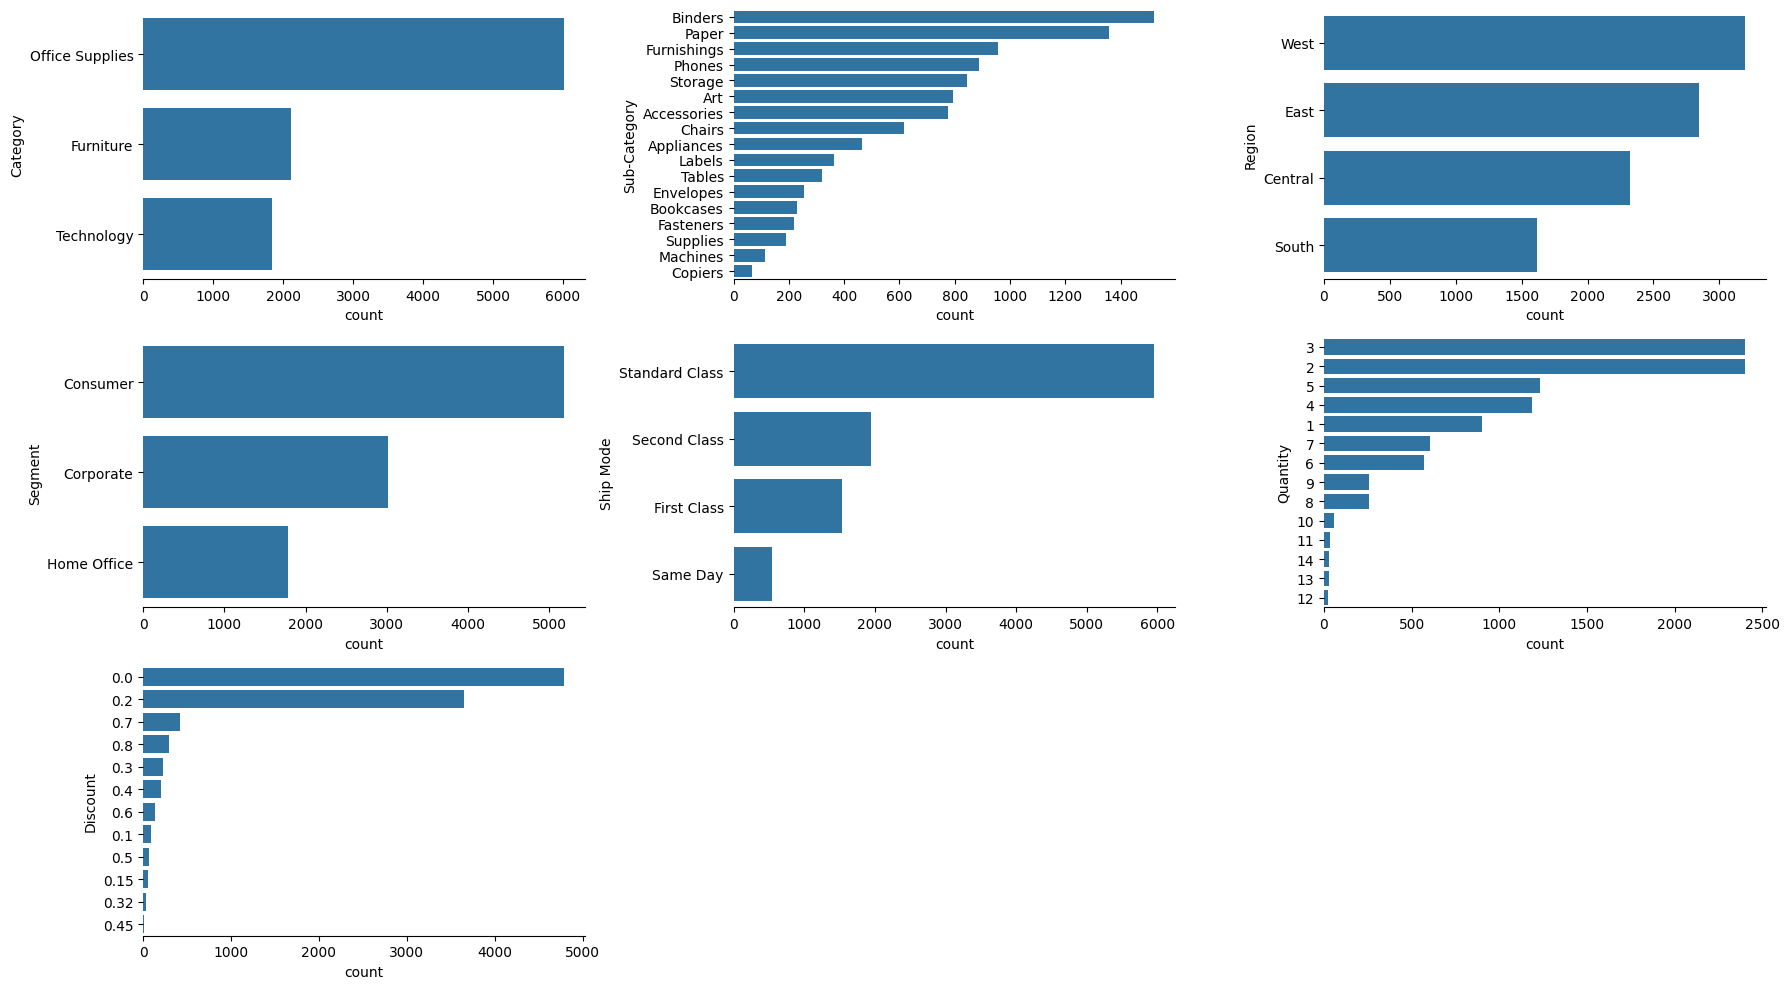

In [7]:
columns = ['Category', 'Sub-Category', 'Region', 'Segment', 'Ship Mode', 'Quantity', 'Discount']

num_rows, num_cols = 3, 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(6*num_cols, 10))

# Flatten the axes array to iterate over features
axes = axes.flatten()

for i, feature in enumerate(columns):
    ax = axes[i]

    # Compute the counts of each category and sort them
    category_counts = retail[feature].value_counts().sort_values(ascending=False)

    # Get the sorted order of categories
    sorted_categories = category_counts.index
    # Plot the 
    sns.countplot(data=retail, y=feature, ax=ax, order=sorted_categories)
    
    ax.grid(False)
    sns.despine(ax=ax, left=True, right=True, top=True, bottom=False)

# Hide empty subplots
empty_plots = [7, 8]

for ax in empty_plots:
    fig.delaxes(axes[ax])

plt.tight_layout()
plt.show()

### Distribution of key Numerical Features
I have visualized the distributions of 'Sales' and 'Profit' using a logarithmic scale. This adjustment is particularly beneficial because both columns span several orders of magnitude. Employing a logarithmic scale enhances visibility, allowing for clearer interpretation of the data distributions.

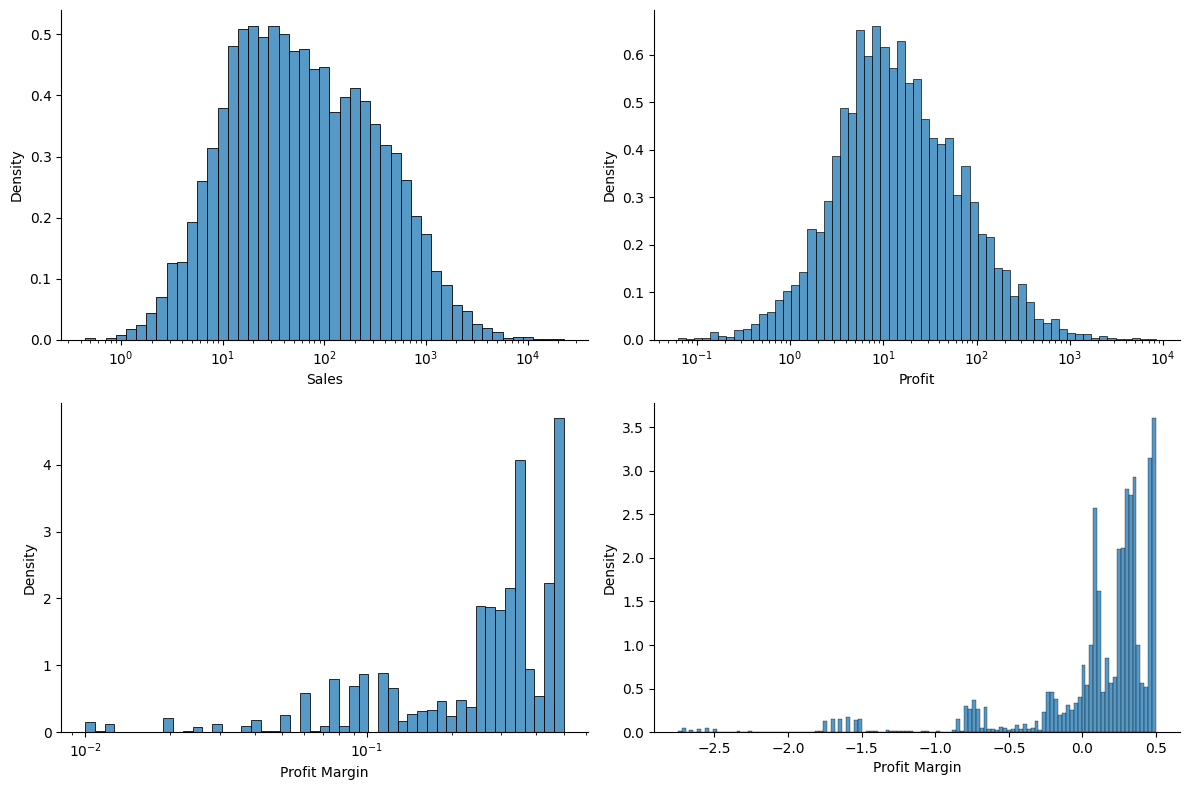

In [8]:
columns = ['Sales', 'Profit', 'Profit Margin']

num_rows, num_cols = 2, 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(6*num_cols, 8))

# Flatten the axes array to iterate over features
axes = axes.flatten()

for i, feature in enumerate(columns):
    ax = axes[i]
    sns.histplot(data=retail, x=feature, ax=ax, stat='density', common_norm=False, log_scale=True)
    
    ax.grid(False)
    sns.despine(ax=ax, left=False, right=True, top=True, bottom=False)

sns.histplot(data=retail, x='Profit Margin', ax=axes[3], stat='density', common_norm=False, log_scale=False)
sns.despine(ax=axes[3], left=False, right=True, top=True, bottom=False)

plt.tight_layout()
plt.show()

## 3. Profitability Analysis
### Profitability by Category
**Insight**:
Among the categories, "Furniture" and "Office Supplies" exhibit lower average profits, with mean profits of $8.70 and $20.35, respectively. In contrast, the "Technology" category stands out with a notably higher mean profit of $78.75.

In [109]:
def plot_horizontalbar_chart(data="df", x1="Sales", x2="Profit", y="y",
                             title1="title1", xlabel1="xlabel1", ylabel="ylabel",
                             title2="title2", xlabel2="xlabel2",
                             figsize=(10, 4)
                             ):
    # Plotting
    num_rows, num_cols = 1, 2
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)

    # Plot horizontal bar plots for total profit and average profit for each y
    sns.barplot(data=data, y=y, x=x1, ax=axes[0])
    sns.barplot(data=data, y=y, x=x2, color='indianred', ax=axes[1])

    # Customize plot appearance
    for ax in axes:
        ax.grid(False)
        sns.despine(left=True, right=True, top=True, bottom=False)

    axes[1].set_yticks([])

    # Set titles and labels for each subplot
    axes[0].set_title(title1, alpha=0.6)
    axes[0].set_xlabel(xlabel1, alpha=0.6)
    axes[0].set_ylabel(ylabel, alpha=0.6)
    axes[1].set_title(title2, alpha=0.6)
    axes[1].set_xlabel(xlabel2, alpha=0.6)
    axes[1].set_ylabel(None)

    # Adjust tick label alpha and spine transparency
    for ax in axes:
        ax.tick_params(axis='both', labelcolor=('black', 0.6))
        for spine in ax.spines.values():
            spine.set_alpha(0.6)

    plt.tight_layout()
    return axes

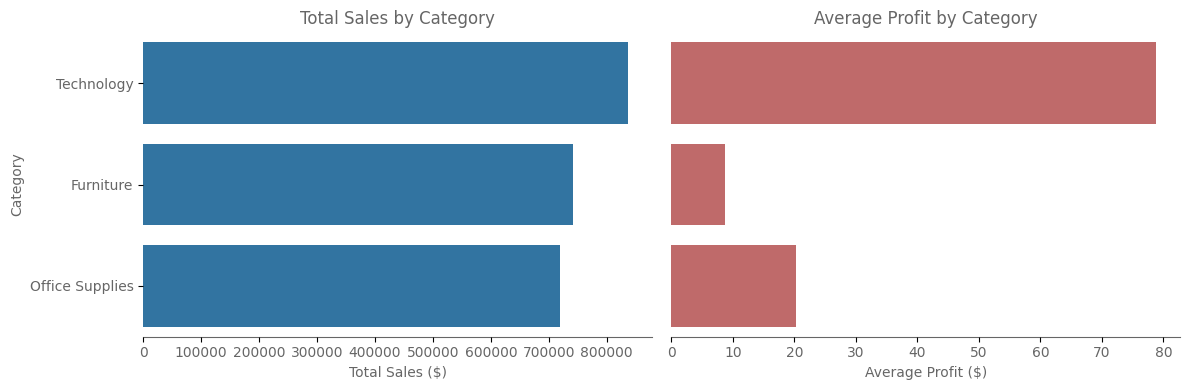

In [111]:
# Compute average profit and average profit margin for each category
category_stats = (retail.groupby('Category')
                  .agg({'Sales': 'sum', 'Profit': 'mean'})
                  .reset_index().sort_values(by="Sales", ascending=False))
                  
# print(f'Distribution of Average Profit & Average Profit by Category:\n {category_stats.round(2)}')

# Plot bar plots for average profit and average profit by category side by side
plot_horizontalbar_chart(data=category_stats, y="Category",
                         title1="Total Sales by Category",
                         title2="Average Profit by Category",
                         xlabel1="Total Sales ($)",
                         xlabel2="Average Profit ($)",
                         ylabel="Category",
                         figsize=(12, 4)
                         );

### Profitability by Sub-Category

Distribution of Total Sales & Average Profit by Category:
    Sub-Category      Sales  Profit
6       Copiers  149528.03  817.91
0   Accessories  167380.32   54.11
13       Phones  330007.05   50.07
5        Chairs  327777.76   43.20
1    Appliances  107532.16   38.92
11     Machines  189238.63   29.43
7     Envelopes   16476.40   27.42
14      Storage  223843.61   25.15
12        Paper   78224.14   24.98
3       Binders  203409.17   19.86
10       Labels   12444.91   15.22
9   Furnishings   91683.02   13.65
2           Art   27107.03    8.21
8     Fasteners    3024.28    4.38
15     Supplies   46673.54   -6.26
4     Bookcases  114880.00  -15.23
16       Tables  206965.53  -55.57


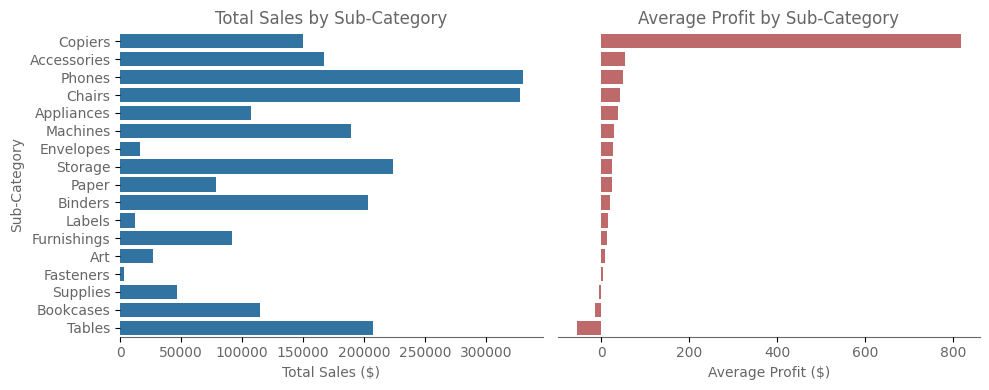

In [112]:
# Compute average profit and average profit margin for each category
subcategory_stats = (retail.groupby('Sub-Category')
                     .agg({'Sales': 'sum', 'Profit': 'mean'})
                     .reset_index().sort_values(by="Profit", ascending=False))

print(f'Distribution of Total Sales & Average Profit by Category:\n {subcategory_stats.round(2)}')

# Plot bar plots for average profit and average profit by Sub-category side by side
plot_horizontalbar_chart(data=subcategory_stats, y="Sub-Category",
                         title1="Total Sales by Sub-Category",
                         title2="Average Profit by Sub-Category",
                         xlabel1="Total Sales ($)",
                         xlabel2="Average Profit ($)",
                         ylabel="Sub-Category"
                         );

## 4. Discount Analysis
### Impact of Discount on Profit

In [103]:
# Correlation between Discount and Profit
discount_profit_corr = retail['Discount'].corr(retail['Profit'])
print(f"Correlation between Discount & Profit is {discount_profit_corr}\n")

# Average discount by Category
category_discount = retail.groupby('Category')['Discount'].mean().reset_index()
print(f'Distribution of average discount by category:\n {category_discount}')

Correlation between Discount & Profit is -0.21966206449082398

Distribution of average discount by category:
           Category  Discount
0        Furniture  0.174027
1  Office Supplies  0.157385
2       Technology  0.132323


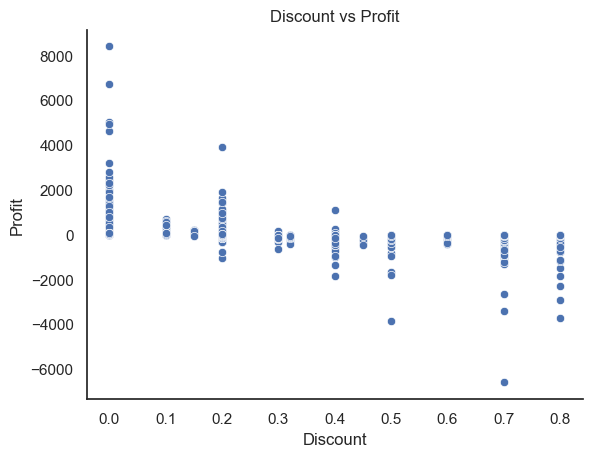

In [25]:
# Visualize relationship between Discount and Profit
sns.scatterplot(data=retail, x='Discount', y='Profit')
sns.despine(left=False, right=True, top=True, bottom=False)
plt.title('Discount vs Profit')
plt.show()

## 5. Regional Analysis
### Profitability by Region

Distribution of Total Sales & Average Profit by Category:
     Region      Sales  Profit
3     West  725255.64   33.93
1     East  678435.20   32.16
0  Central  500782.85   17.10
2    South  391721.90   28.86


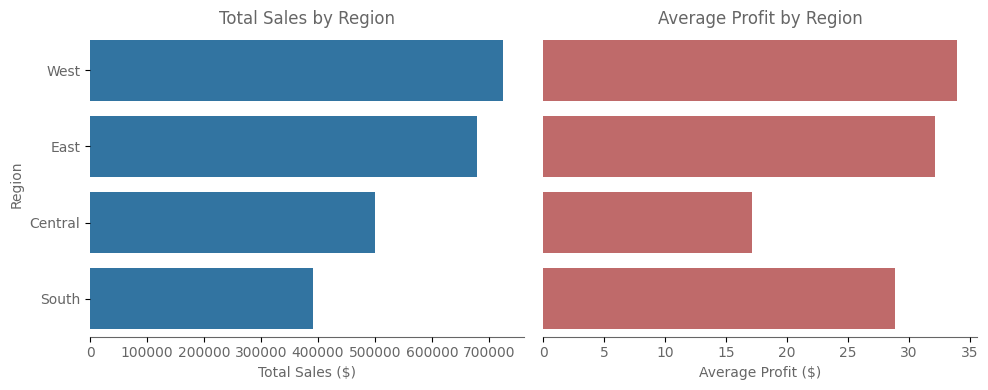

In [113]:
# Total and average profit by Region
region_stats = (retail.groupby('Region')
                .agg({'Sales': 'sum', 'Profit': 'mean'})
                .reset_index().sort_values(by="Sales", ascending=False))

print(f'Distribution of Total Sales & Average Profit by Category:\n {region_stats.round(2)}')

# Visualize profit distribution by Region
plot_horizontalbar_chart(data=region_stats, y="Region",
                         title1="Total Sales by Region",
                         title2="Average Profit by Region",
                         xlabel1="Total Sales ($)",
                         xlabel2="Average Profit ($)",
                         ylabel="Region"
                         );

### State and City analysis

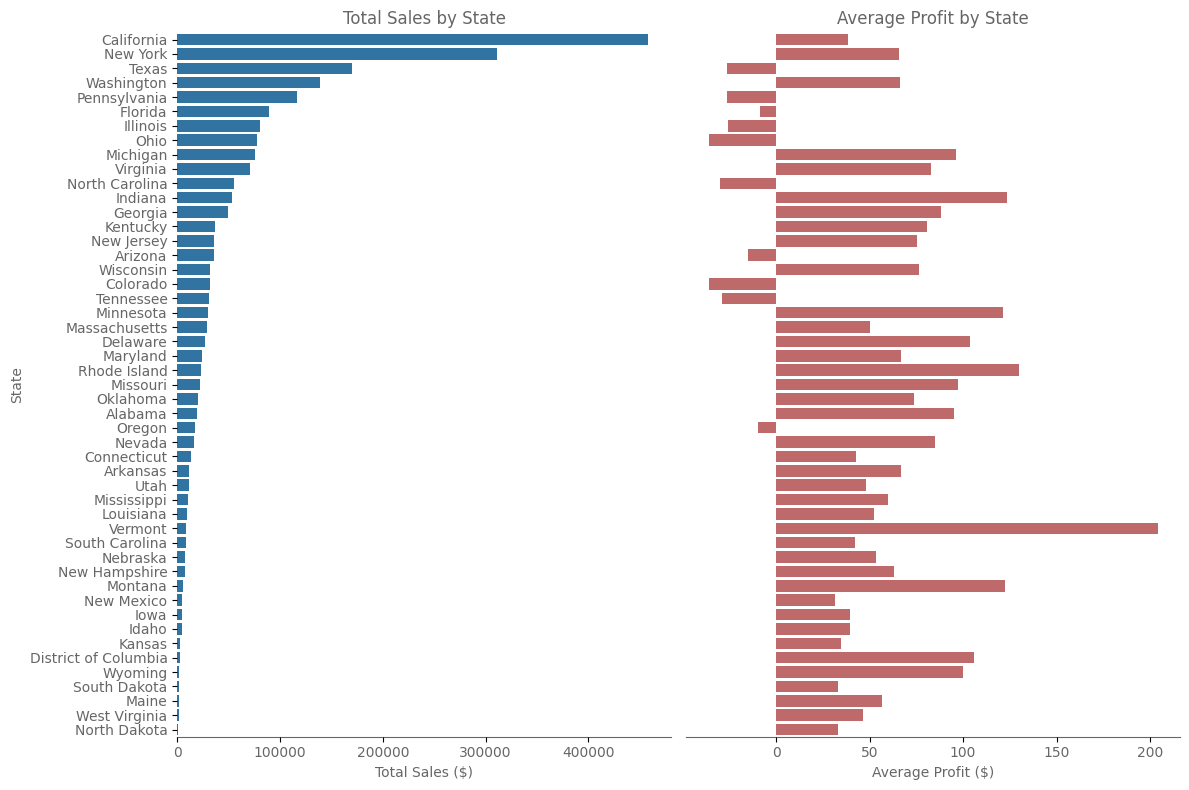

In [130]:
# Total and average profit by State
state_stats = (retail.groupby('State')
               .agg({'Sales': 'sum', 'Profit': 'mean'})
               .sort_values(by="Sales", ascending=False)
               .reset_index())
            #    .iloc[:30, :])

# print(f'Distribution of Total Sales & Average Profit by States:\n {state_stats.round(2)}')

# Visualize profit distribution by State
plot_horizontalbar_chart(data=state_stats, y="State",
                         title1="Total Sales by State",
                         title2="Average Profit by State",
                         xlabel1="Total Sales ($)",
                         xlabel2="Average Profit ($)",
                         ylabel="State",
                         figsize=(12, 8)
                         );

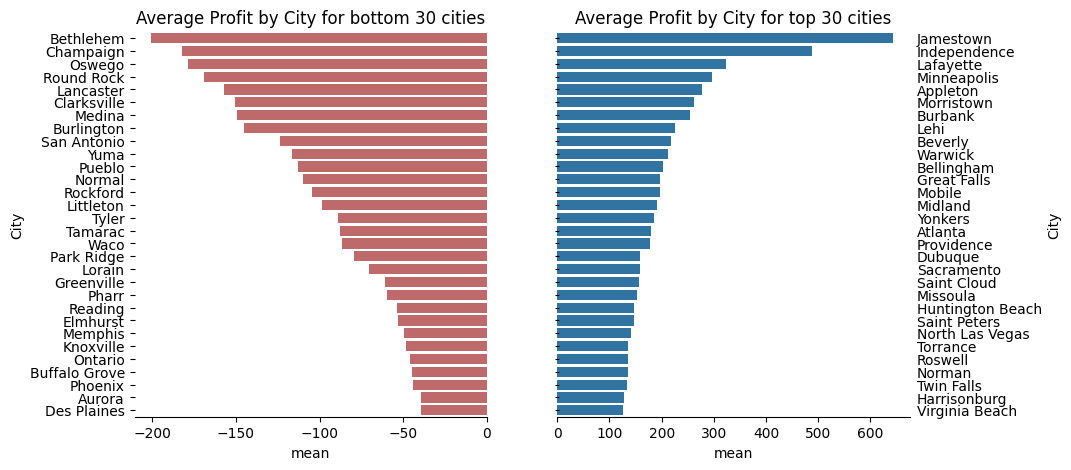

In [146]:
# Total and average profit by City
city_profit = retail.groupby('City')['Profit'].agg(['sum', 'mean']).reset_index()
bottom_city_profit = city_profit.sort_values(by='mean').iloc[:30, :]
top_city_profit = city_profit.sort_values(by='mean', ascending=False).iloc[:30, :]

# Visualize profit distribution by City
num_rows, num_cols = 1, 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 5))
sns.barplot(data=bottom_city_profit, y='City', x='mean', ax=axes[0], color='indianred')
sns.barplot(data=top_city_profit, y='City', x='mean', ax=axes[1])

# Move y-labels to the right side of the plot for the top cities subplot
axes[1].tick_params(axis='y', direction='inout', labelleft=False, labelright=True)

sns.despine(left=True, right=True, top=True, bottom=False)

# Add the y-label on the right side for the top cities subplot
axes[1].yaxis.set_label_position("right")
axes[1].set_ylabel('City')

# Set titles for each subplot
axes[0].set_title('Average Profit by City for bottom 30 cities')
axes[1].set_title('Average Profit by City for top 30 cities')

plt.show()

## 6. Segment Analysis
### Profitability by Segment

Distribution of Total Sales & Average Profit by Segment:
        Segment       Sales  Profit
0     Consumer  1160832.77   25.86
1    Corporate   706070.13   30.50
2  Home Office   429292.68   33.88


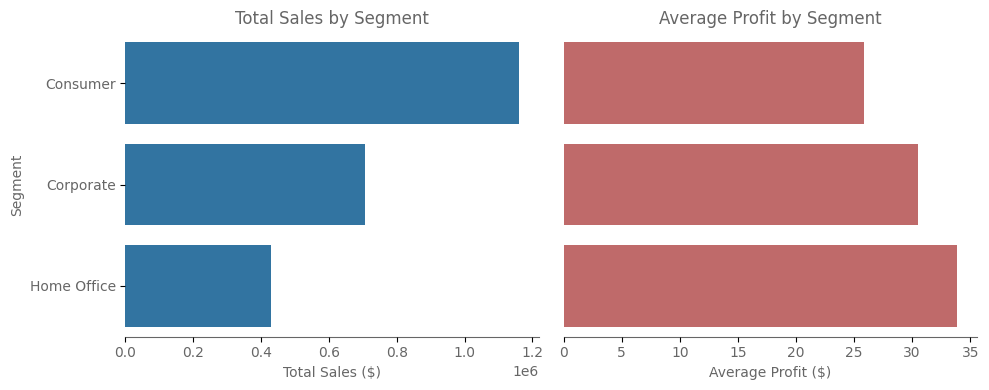

In [133]:
# Total and average profit by Segment
segment_stats = (retail.groupby('Segment')
                 .agg({'Sales': 'sum', 'Profit': 'mean'})
                 .reset_index().sort_values(by="Sales", ascending=False))

print(f'Distribution of Total Sales & Average Profit by Segment:\n {segment_stats.round(2)}')
                  
# Visualize profit distribution by Segment
plot_horizontalbar_chart(data=segment_stats, y="Segment",
                         title1="Total Sales by Segment",
                         title2="Average Profit by Segment",
                         xlabel1="Total Sales ($)",
                         xlabel2="Average Profit ($)",
                         ylabel="Segment"
                         );

## 7. Ship Mode Analysis
### Profitability by Ship Mode

Distribution of Total Sales & Average Profit by Ship Mode:
        Segment       Sales  Profit
0     Consumer  1160832.77   25.86
1    Corporate   706070.13   30.50
2  Home Office   429292.68   33.88


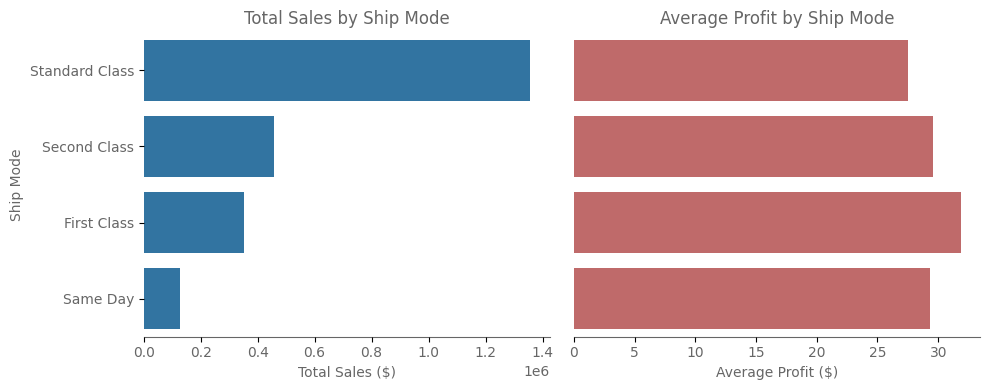

In [134]:
# Total and average profit by Ship Mode
shipmode_stats = (retail.groupby('Ship Mode')
                  .agg({'Sales': 'sum', 'Profit': 'mean'})
                  .reset_index().sort_values(by="Sales", ascending=False))

print(f'Distribution of Total Sales & Average Profit by Ship Mode:\n {segment_stats.round(2)}')
                                     
# Visualize profit distribution by Ship Mode
plot_horizontalbar_chart(data=shipmode_stats, y="Ship Mode",
                         title1="Total Sales by Ship Mode",
                         title2="Average Profit by Ship Mode",
                         xlabel1="Total Sales ($)",
                         xlabel2="Average Profit ($)",
                         ylabel="Ship Mode"
                         );

## Summary and Recommendations
Based on the analysis, the following key findings and recommendations are made:

- **High Discounts Leading to Low Profits**: Categories like X and Y have high discounts and low profits. It is recommended to re-evaluate the discount strategy for these categories.
- **Unprofitable Categories and Sub-Categories**: Sub-categories such as A, B, and C are consistently unprofitable. Consider discontinuing these products or finding ways to reduce costs.
- **Regional Disparities in Profit**: Regions such as M and N have lower average profits. Investigate local market conditions and develop targeted strategies for these areas.
- **Segment Profitability Issues**: The Home Office segment has lower average profits. Tailor marketing efforts to better address the needs of this segment.
- **Shipping Cost Impact**: Same Day shipping is less profitable. Optimize shipping strategies by promoting more cost-effective options.

In [9]:
import folium
from geopy.geocoders import Nominatim

df = retail.groupby('Postal Code').agg({'Sales': 'sum'}).reset_index()

# Initialize a geocoder
# geolocator = Nominatim(user_agent="sales_visualization") 

# def geocode_postal_code(zips):
#     locations = [geolocator.geocode(f"{zip}, USA", addressdetails=True) for zip in zips]
#     if locations:
#         # Extract latitude and longitude from location objects
#         latitude = [location.latitude for location in locations]
#         longitude = [location.longitude for location in locations]
#         return latitude, longitude
#     else:
#         return None, None

# # Geocode postal codes and add latitude and longitude columns to DataFrame
# df['Latitude'], df['Longitude'] = geocode_postal_code(df['Postal Code'])

In [10]:
# Create a Folium map centered at the mean latitude and longitude
# map_sales = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=10)

# # # Define color scheme for each sales category
# color_scheme = {
#     'Low': 'blue',
#     'Medium-Low': 'green',
#     'Medium-High': 'orange',
#     'High': 'red'
# }


# # Add markers for each aggregated sales location with different colors for each category
# for lat, lon, postal_code, sales, category in zip(df['Latitude'], df['Longitude'], df['Postal Code'], df['Sales'], df['Sales Category']):
#     color = color_scheme.get(category, 'gray')  # Default to gray if category not found in color scheme
#     folium.Marker([lat, lon], popup=f"Postal Code: {postal_code}, Total Sales: ${sales}", icon=folium.Icon(color=color)).add_to(map_sales)

# # Display the map
# map_sales.save('sales_map.html')

In [10]:
# df = pd.merge(df, geolocation, on='Postal Code')

In [ ]:
# bin_edges = [-float('inf'), 270.13, 1043.03, 3215.14, float('inf')]
# bin_labels = ['Low', 'Medium-Low', 'Medium-High', 'High']
# df['Sales Category'] = pd.cut(df['Sales'], bins=bin_edges, labels=bin_labels)

In [11]:
# df1 = pd.merge(retail, df, on='Postal Code')
# df1.head()

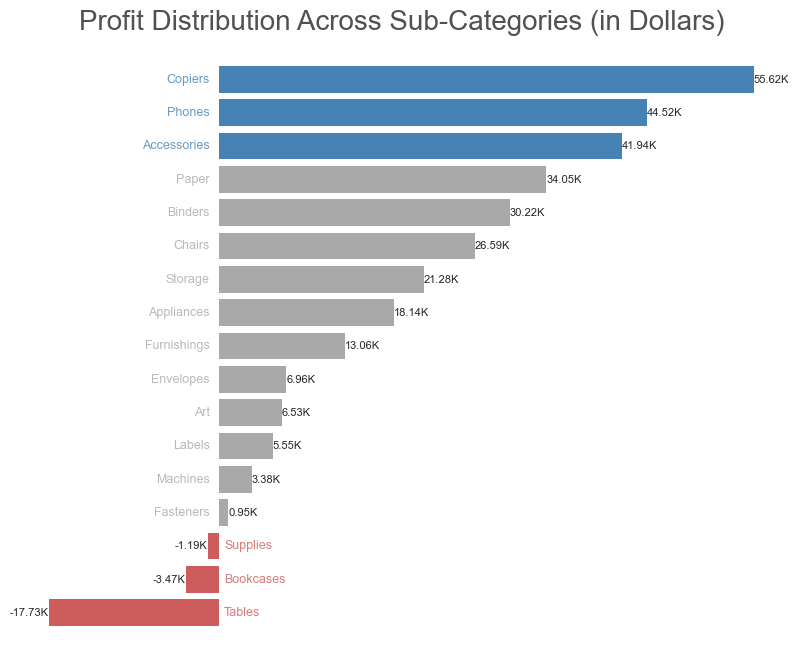

In [12]:
df = retail.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=True)

plt.figure(figsize=(10, 8))
sequence = range(len(df))
pos = list(sequence)

bars = plt.barh(pos, df, align='center', color='darkgrey', linewidth=0)

for i, bar in enumerate(bars):
    width = bar.get_width()
    width = width / 1000
    text = str(float(width.round(2))) + "K"
    height = bar.get_y() + bar.get_height() / 2
    width = bar.get_width()

    if i < 3:
        bar.set_color('indianred')
        plt.text(width, height, text, ha='right', va='center', fontsize=8)
        plt.text(500, bar.get_y() + bar.get_height()/2,
             df.index[i], va='center', ha='left',
             fontsize=9, color='indianred', alpha=0.8)
    elif i > 13:
        bar.set_color('steelblue')
        plt.text(width, height, text, ha='left', va='center', fontsize=8)
        plt.text(-1000, bar.get_y() + bar.get_height()/2,
             df.index[i], va='center', ha='right',
             fontsize=9, color='steelblue', alpha=0.8)
    if i in range(3, 14):
        plt.text(width, height, text, ha='left', va='center', fontsize=8)
        plt.text(-1000, bar.get_y() + bar.get_height()/2,
             df.index[i], va='center', ha='right',
             fontsize=9, alpha=0.8, color='darkgrey')

    
plt.yticks(pos, df.index, alpha=0.8);

for spine in plt.gca().spines.values():
    spine.set_visible(False);

plt.xticks([])
plt.yticks([])

plt.title('Profit Distribution Across Sub-Categories (in Dollars)', alpha=0.8, fontsize=20)
plt.show()